## Classification


## Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12





Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: 

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: 

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



### 1. Data exploration: 

In [106]:
## Reading data
pd.options.display.max_columns = None
df = pd.read_excel("default of credit card clients.xls", skiprows=1, header = 0)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

#### Attribute Information:

**default payment** (Yes = 1, No = 0)

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the 
individual consumer credit and his/her family (supplementary) credit.

**Sex**: Gender (1 = male; 2 = female).

**Education**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**Marriage** : Marital status (1 = married; 2 = single; 3 = others).

**Age** (year).

**Pay_0 - Pay_6**: History of past payment. We tracked the past monthly payment 
records (from April to September, 2005) as follows:

* Pay_0 = the repayment status in September, 2005; 
* Pay_2 = the repayment status in August, 2005; . . .;
* Pay_6 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: 
* -1 = pay duly; 
* 1 = payment delay for one month; 
* 2 = payment delay for two months;. . .; 
* 8 = payment delay for eight months; 
* 9 = payment delay for nine months and above.

**Bill_AMT1 to Bill_AMT6**: Amount of bill statement (NT dollar). 

* Bill_AMT1 = amount of bill statement in September, 2005; 
* Bill_AMT2 = amount of bill statement in August, 2005; . . .; 
* Bill_AMT6 = amount of bill statement in April, 2005.

**PAY_AMT1 to PAY_AMT6**: Amount of previous payment (NT dollar). 

* PAY_AMT1 = amount paid in September, 2005; 
* PAY_AMT2 = amount paid in August, 2005; . . .;
* PAY_AMT6 = amount paid in April, 2005.

In [120]:
df.rename(columns={'default payment next month':"Default"},inplace=True)
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  29999.000000    29999.000000  29999.000000  29999.000000  29999.000000   
mean   15000.823427   167488.238941      1.603753      1.853128      1.551852   
std     8660.361539   129748.050993      0.489125      0.790361      0.521972   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7501.500000    50000.000000      1.000000      1.000000      1.000000   
50%    15001.000000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.500000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean      35.485883     -0.016701     -0.133771     -0.166206     -0.220674   
std        9.217819      1.123820      1.197206      1.196887      1.169157   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  29999.000000  29999.000000   29999.000000   29999.000000  2.999900e+04   
mean      -0.266209     -0.291110   51223.363545   49180.114937  4.701409e+04   
std        1.133205      1.150006   73637.087694   71174.727228  6.935035e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.500000    2984.500000  2.665500e+03   
50%        0.000000      0.000000   22381.000000   21203.000000  2.008900e+04   
75%        0.000000      0.000000   67092.000000   64008.500000  6.016550e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   29999.000000   29999.000000   29999.000000   29999.000000   
mean    43263.745458   40312.085736   38872.409980    5663.722624   
std     64333.780490   60798.053423   59554.993883   16563.538132   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.500000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.000000   17068.000000    2100.000000   
75%     54509.000000   50196.000000   49200.500000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.999900e+04   29999.000000   29999.000000   29999.000000   
mean   5.921318e+03    5225.832361    4826.214407    4799.524284   
std    2.304124e+04   17607.235547   15666.402749   15278.541999   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.330000e+02     390.000000     296.000000     252.000000   
50%    2.009000e+03    1800.000000    1500.000000    1500.000000   
75%    5.000000e+03    4505.000000    4013.500000    4032.000000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6       Default  
count   29999.000000  29999.000000  
mean     5215.653088      0.221207  
std     17777.742966      0.415067  
min         0.000000      0.000000  
25%       117.500000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000

It seems the maximum of BILL_AMT3 and PAY_AMT2 is much higher compared to other maximums. There might be an outlier that later will be investigated more.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [108]:
column_stat=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']
column_pay=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
column_bill=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
column_amt=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


# Grouping the categorical and discrete features
column_default=['Default']
categorical_vars=['SEX','EDUCATION','MARRIAGE']+column_pay
discrete_vars=['LIMIT_BAL']+column_bill+column_amt


<Figure size 3600x3600 with 0 Axes>

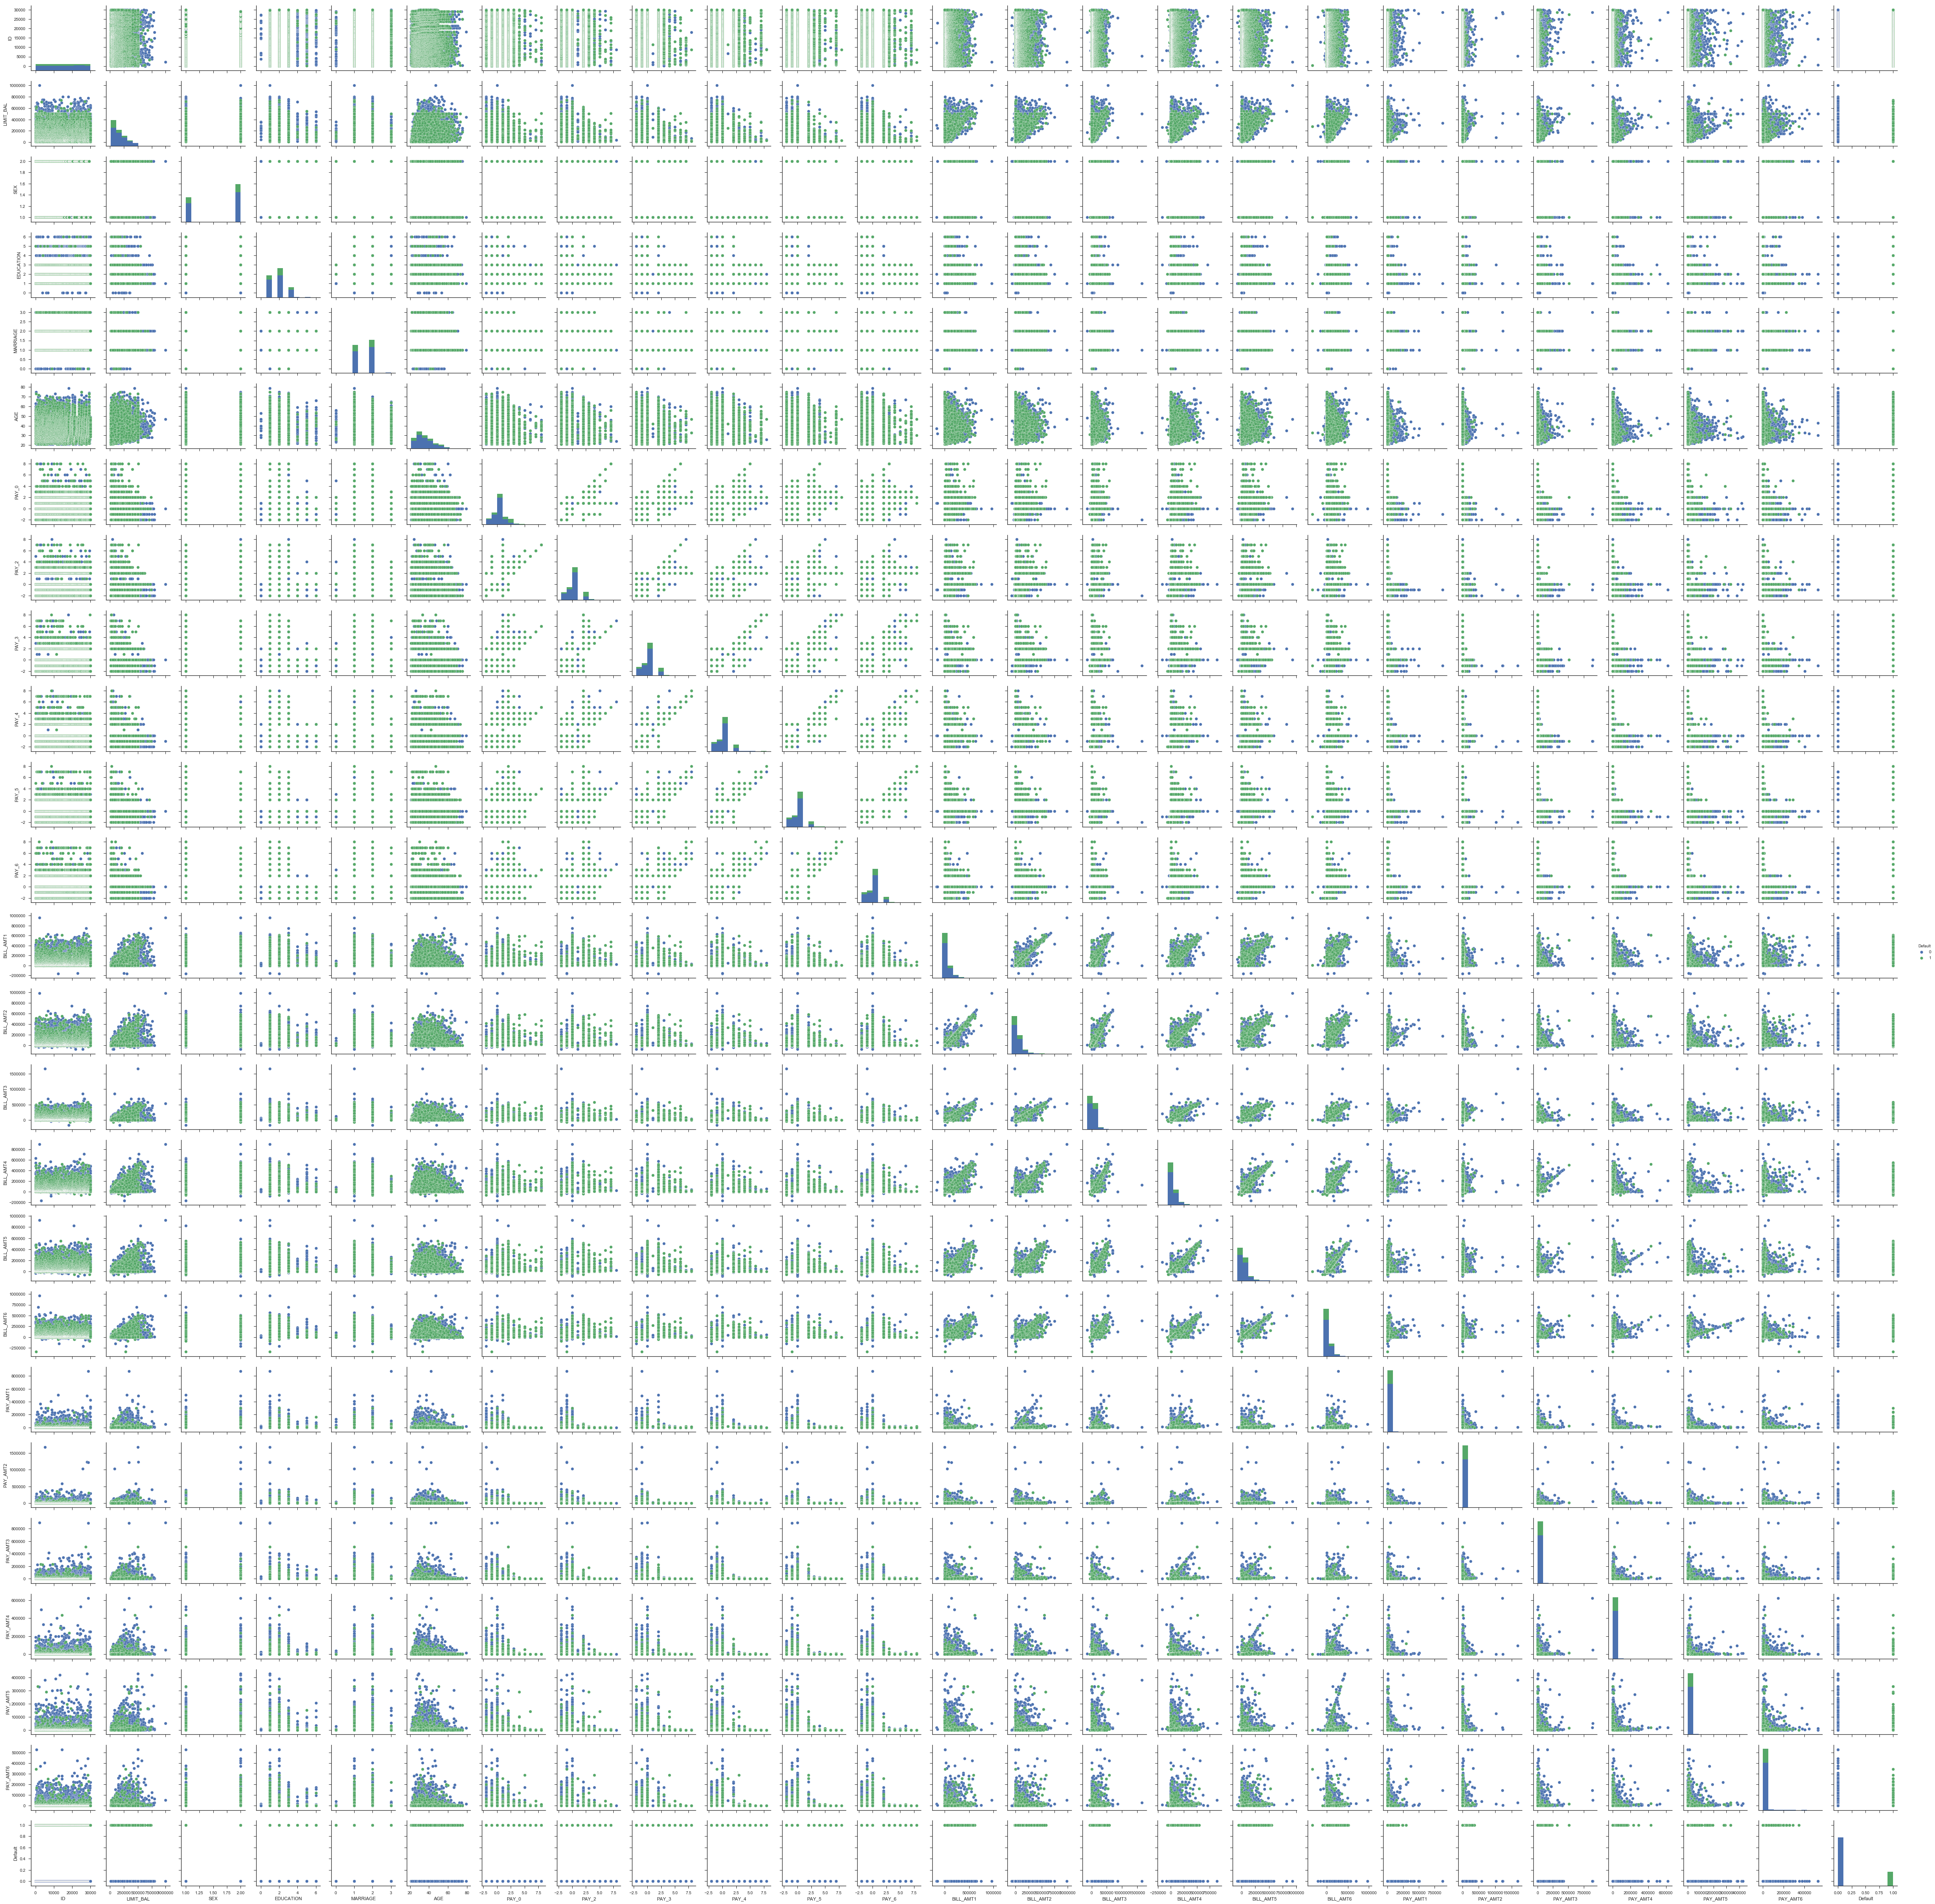

In [7]:
# Preparing pair plot
sns.set(style='ticks')
plt.figure(figsize=(50,50))
sns.pairplot(df, hue='Default')



Since the pair plot graph is very crowded and does not look useful, some of the pair plots are visualized seperately.

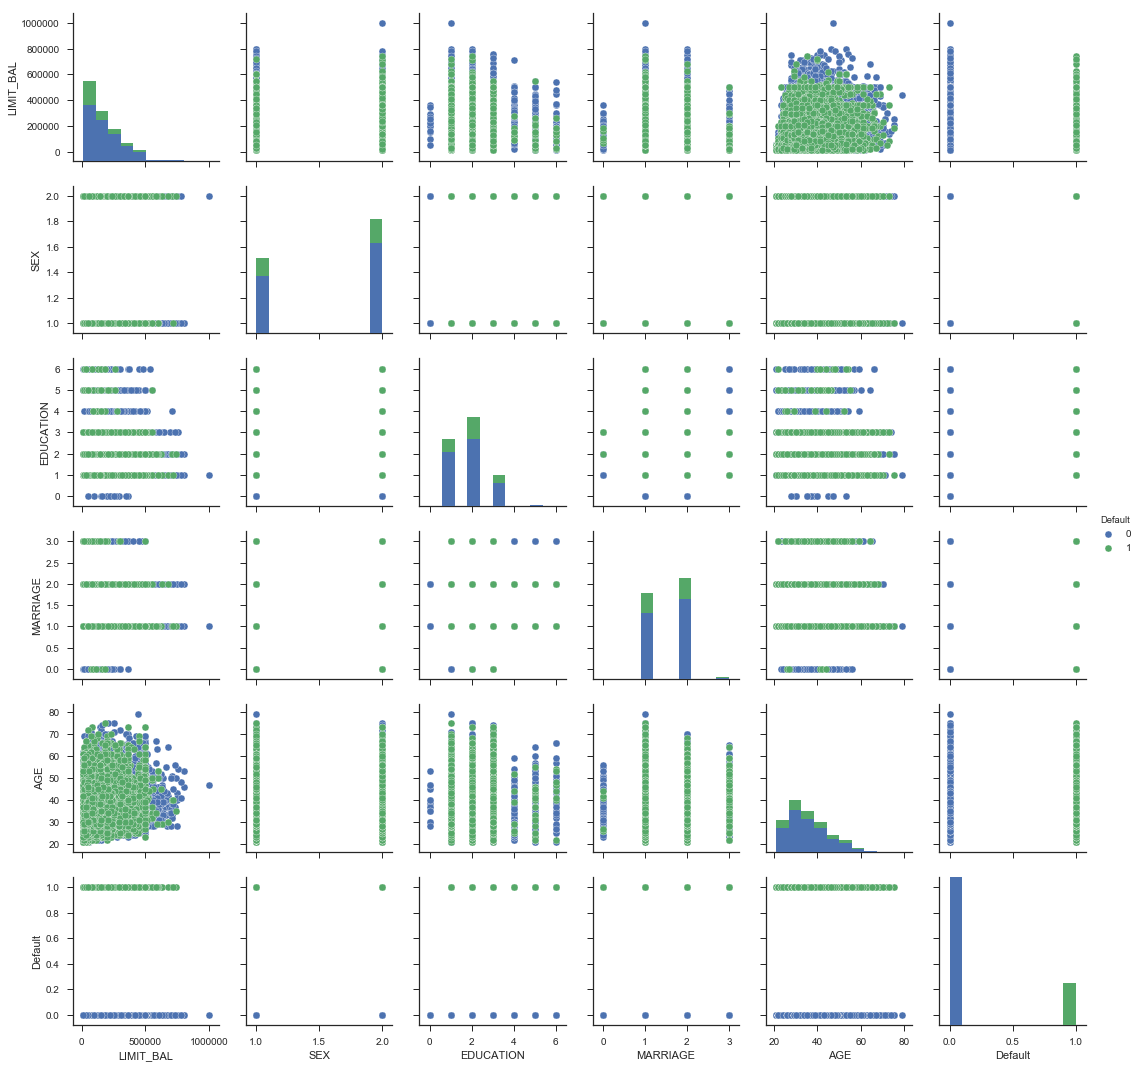

In [13]:
sns.pairplot(df[column_stat+column_default],hue='Default')

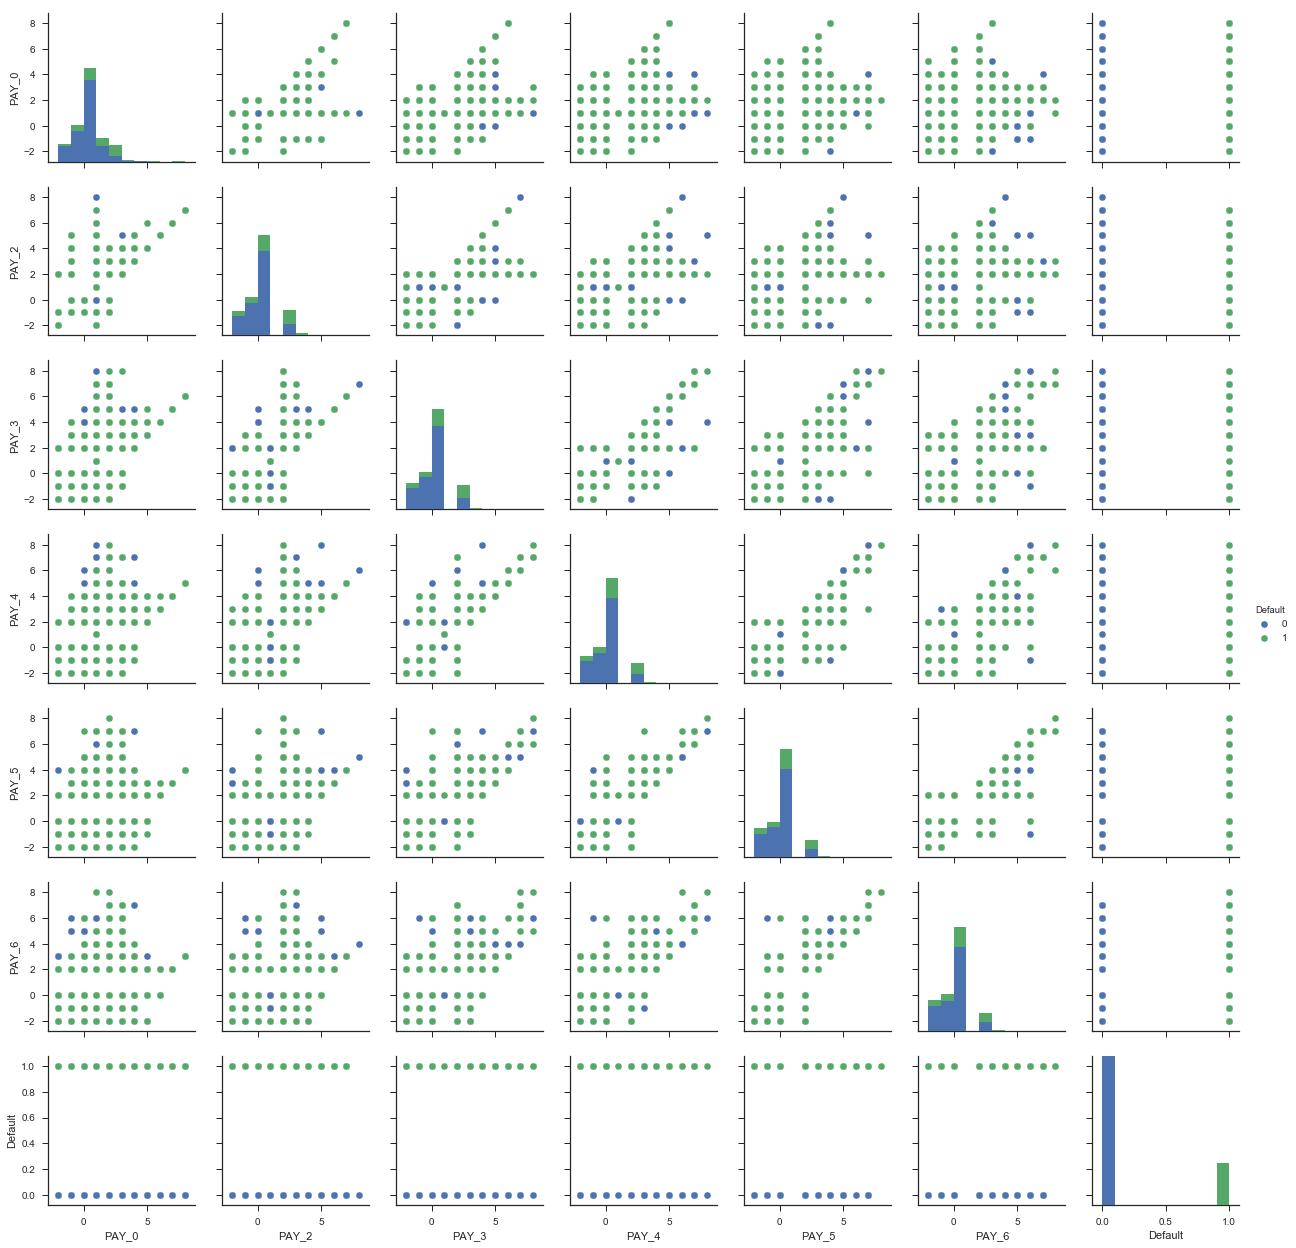

In [11]:
sns.pairplot(df[column_pay+column_default],hue='Default')

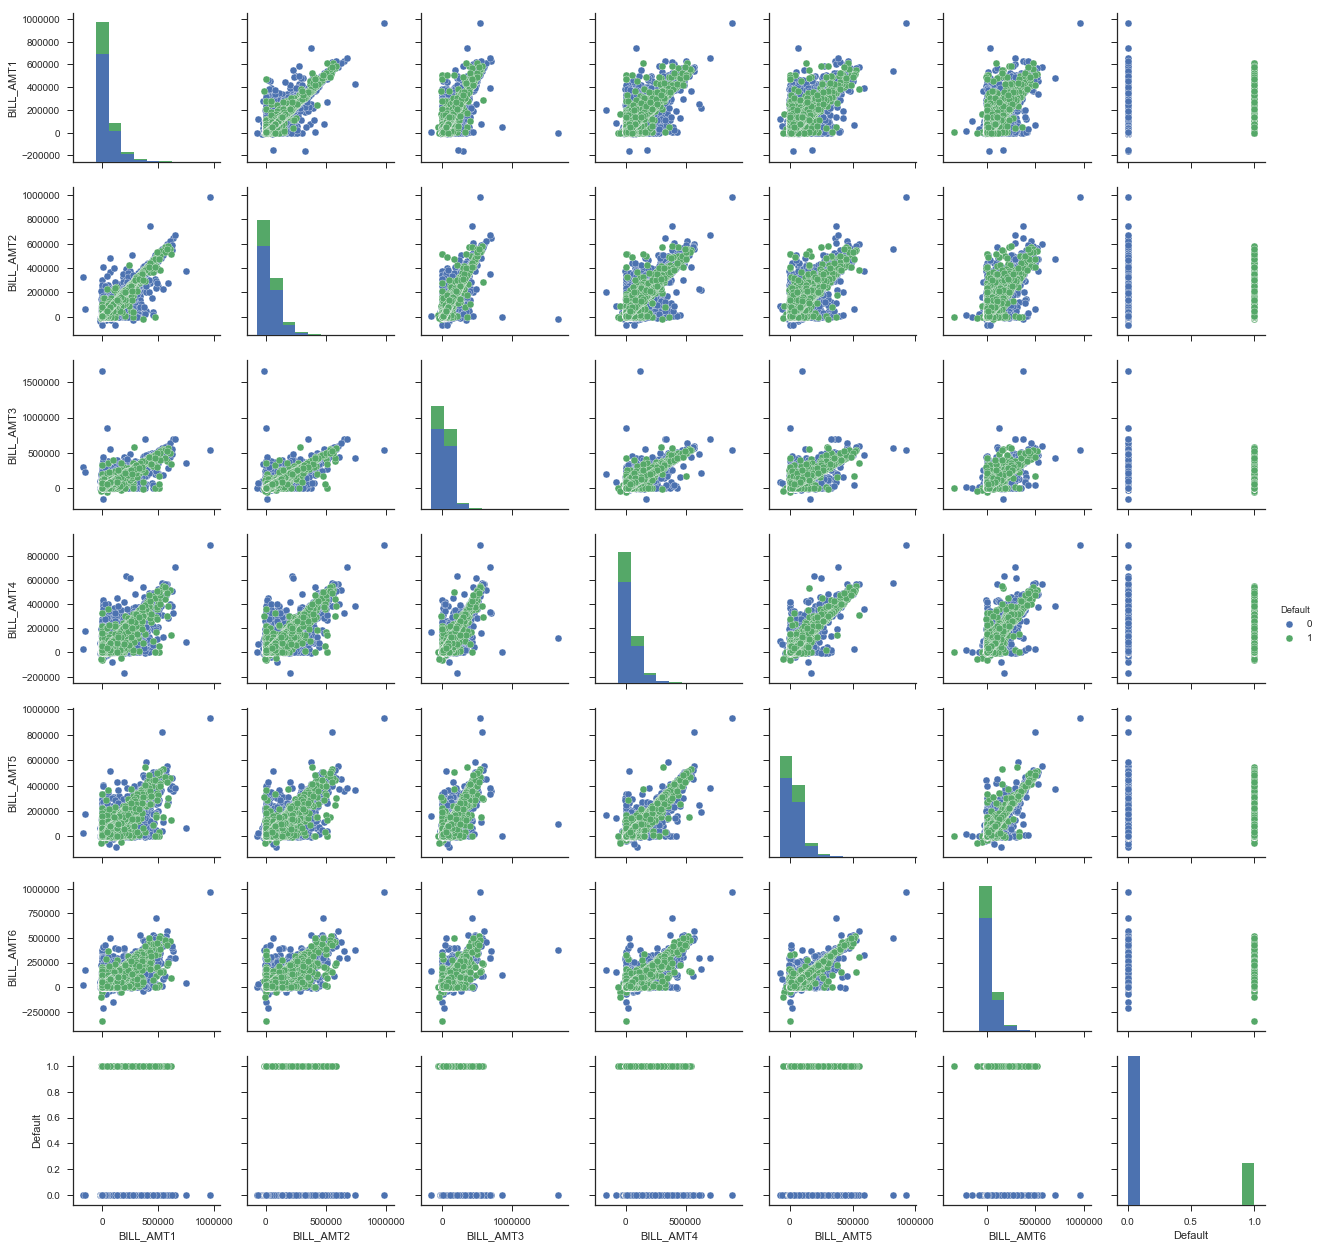

In [14]:
sns.pairplot(df[column_bill+column_default],hue='Default')

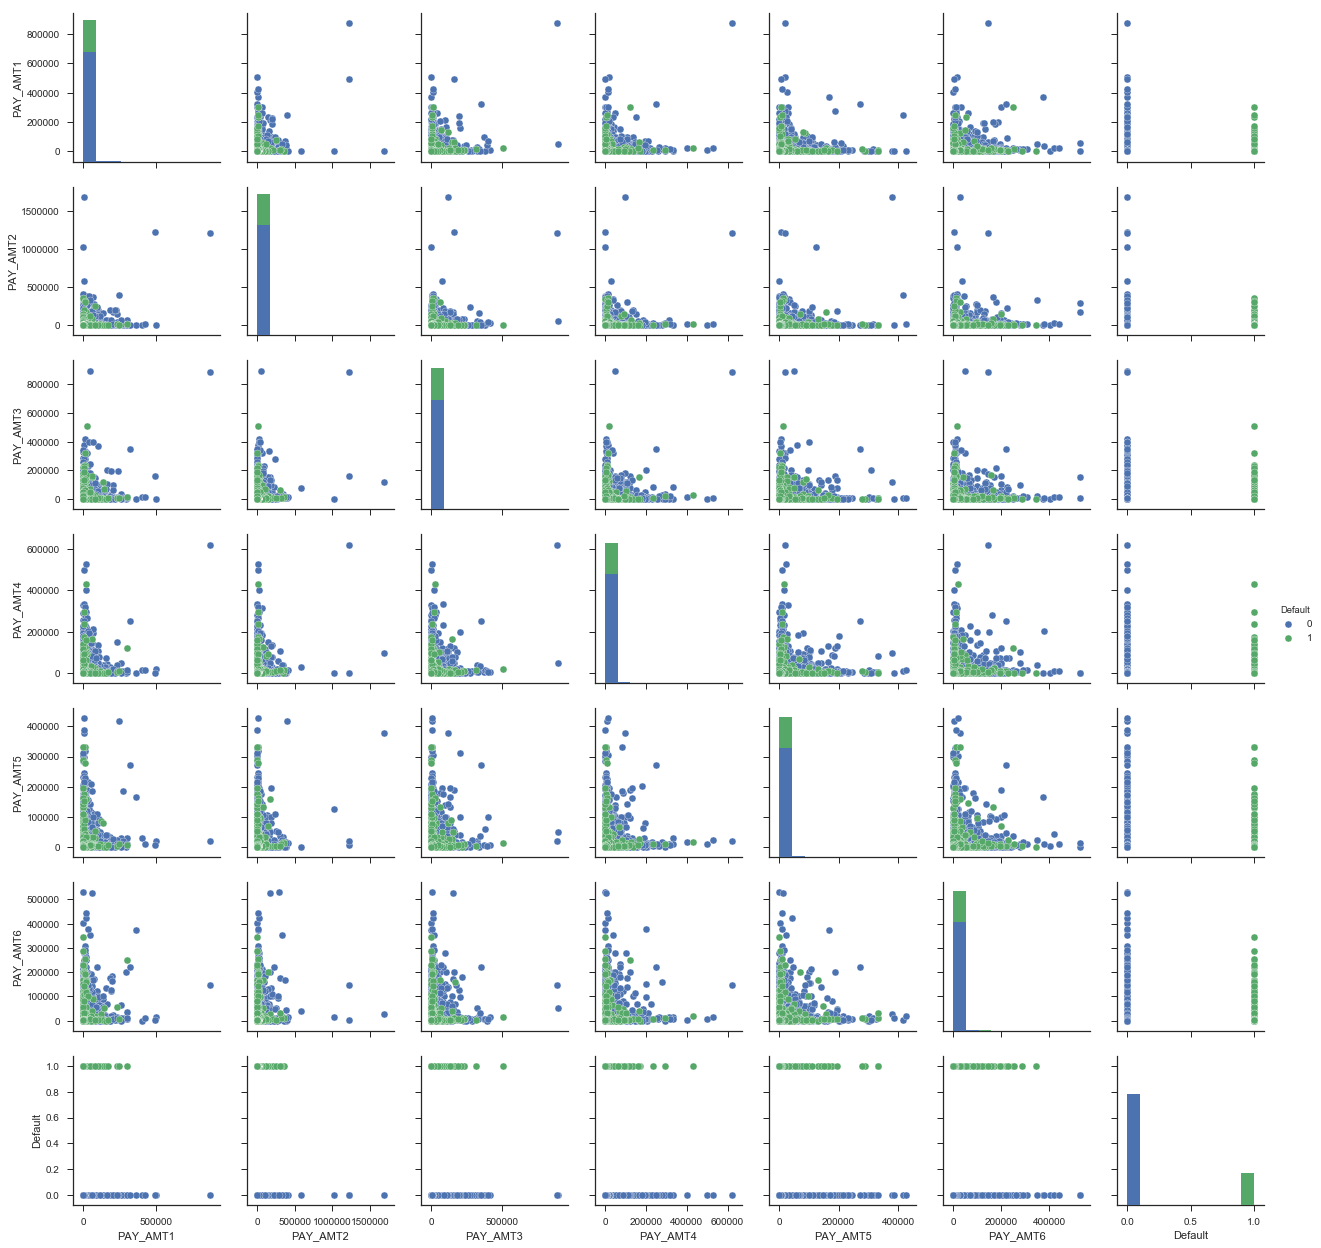

In [15]:
sns.pairplot(df[column_amt+column_default],hue='Default')

Looking at the data info and data decription, it seems there is no invalid data. all the data are in the defined range and there is no Nan.

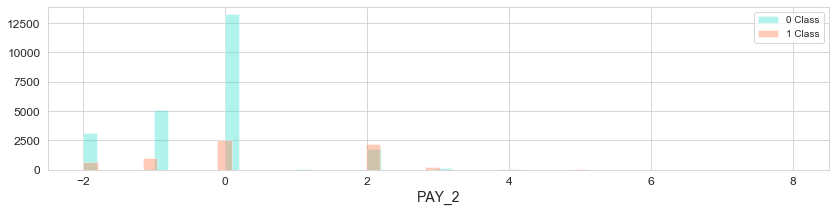

In [73]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['PAY_2'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['PAY_2'], color='coral', kde=False, label='1 Class')

plt.legend()
plt.show()


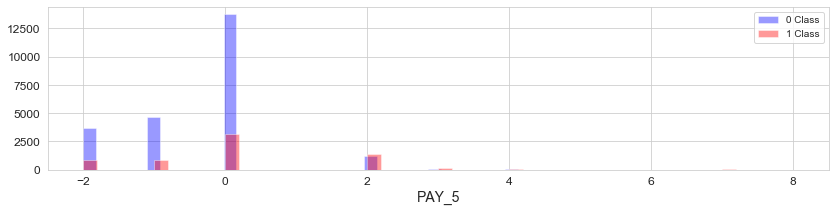

In [74]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['PAY_5'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['PAY_5'], color='red', kde=False, label='1 Class')

plt.legend()
plt.show()

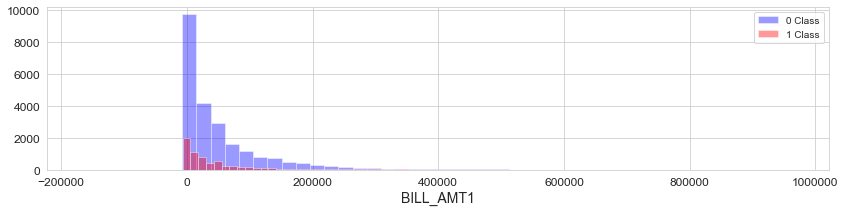

In [115]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['BILL_AMT1'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['BILL_AMT1'], color='red', kde=False, label='1 Class')

plt.legend()
plt.show()

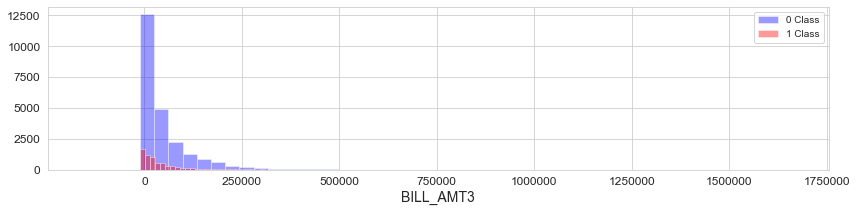

In [114]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['BILL_AMT3'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['BILL_AMT3'], color='red', kde=False, label='1 Class')

plt.legend()
plt.show()

In [121]:
df.loc[df.BILL_AMT3==df.BILL_AMT3.max()]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
5296  5297     500000    2          1         1   33     -2     -2     -1   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
5296     -1     -2     -1        125     -18088    1664089     121757   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
5296      97115     377217      4366   1684259    121831     97670    379267   

      PAY_AMT6  Default  
5296     26759        0

In [125]:
# removing the outlier
df.drop(index=5296, inplace=True)

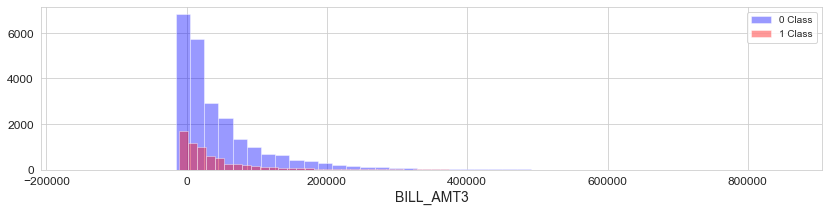

In [126]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['BILL_AMT3'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['BILL_AMT3'], color='red', kde=False, label='1 Class')

plt.legend()
plt.show()

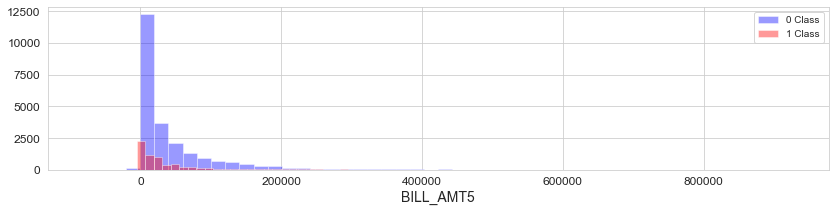

In [113]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['BILL_AMT5'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['BILL_AMT5'], color='red', kde=False, label='1 Class')

plt.legend()
plt.show()

It seems when the bill amount is higher, there is  more tendecy of not paying it.

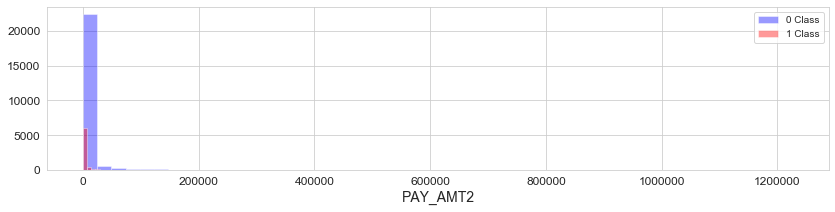

In [127]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['PAY_AMT2'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['PAY_AMT2'], color='red', kde=False, label='1 Class')

#plt.ylim([0,1000])
plt.legend()
plt.show()

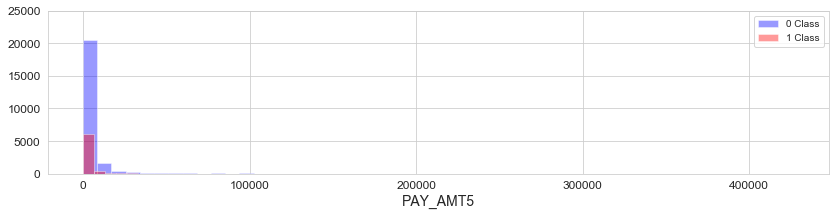

In [104]:
plt.figure(figsize=(14,3))

sns.distplot(df[df.Default == 0]['PAY_AMT5'], color='blue', kde=False, label='0 Class')
sns.distplot(df[df.Default == 1]['PAY_AMT5'], color='red', kde=False, label='1 Class')

plt.ylim([0,25000])
plt.legend()
plt.show()

### 2. Data Preprocessing: 

In [27]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc


**2.1 Transformation pipelines**

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


To transform the features, OneHotEncoder is used for categorical data and MinMaxScaler is used for descrete data. Looking at the info() and describe() output, it seems there is no outlier ( except the one already deleted) and ther eis no NAN value.

In [129]:
# Categorical -  one hot encode
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical -  scale
num_pipe = Pipeline([ ('scl', MinMaxScaler())])
num_transformers = [('num', num_pipe, discrete_vars)]

**2.2 Using pipelines to transform the data**

In [130]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)

X = ct.fit_transform(df[categorical_vars + discrete_vars])
y = df[['Default']].values

**2.3 Train-Test Split**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29998, 25)
(23998, 90) (6000, 90) (23998, 1) (6000, 1)


### 3. Classification: 

**Corss Validation**

A number of classifires are checked on the training set by comparing their cross validation scores.

In [132]:
classifiers = [knnc(),rfc(),dtc(),SVC(),SVC(kernel='linear'),gnb()]
classifier_names = ['K nearest neighbors',
                    'Random Forest',
                    'Decision Tree Classifier',
                    'SVM classifier with RBF kernel',
                    'SVM classifier with linear kernel',
                    'Gaussian Naive Bayes']

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  79.615 % std:  0.002 %


C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Machin

Random Forest  mean accuracy:  80.64 % std:  0.001 %
Decision Tree Classifier  mean accuracy:  73.094 % std:  0.003 %


C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Instal

SVM classifier with RBF kernel  mean accuracy:  82.09 % std:  0.0 %
SVM classifier with linear kernel  mean accuracy:  82.099 % std:  0.0 %
Gaussian Naive Bayes  mean accuracy:  79.986 % std:  0.004 %


**Selecting a model**

Based on the CV scores it seems SVM is ht ebest model but according to the assignment I'll continue working on random forest and knn.

**Training selected models**

In [169]:
final_model_knnc=knnc().fit(X_train, np.ravel(y_train))
final_model_rfc = rfc().fit(X_train, np.ravel(y_train))

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Confusion matrix for test dataset**

test accuracy for knnc classifier: 79.5 %


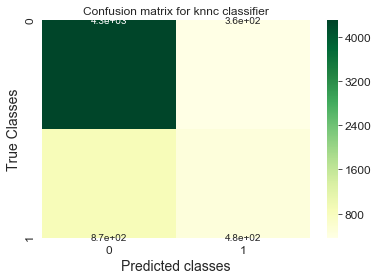

test accuracy for rfc classifier: 79.98 %


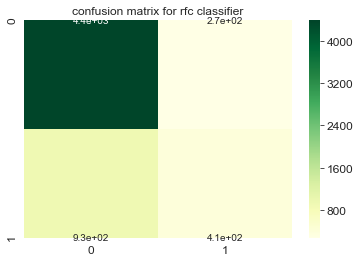

In [134]:
y_hat_knnc = final_model_knnc.predict(X_test)
y_hat_rfc = final_model_rfc.predict(X_test)

print('test accuracy for knnc classifier:'\
      , round(accuracy_score(np.ravel(y_test), y_hat_knnc)*100, 2), '%')
plt.title('Confusion matrix for knnc classifier')
sns.heatmap(confusion_matrix(np.ravel(y_test), y_hat_knnc), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for rfc classifier:', \
      round(accuracy_score(np.ravel(y_test), y_hat_rfc)*100, 2),'%')
plt.title('confusion matrix for rfc classifier')
sns.heatmap(confusion_matrix(np.ravel(y_test), y_hat_rfc), annot=True,  cmap="YlGn")
plt.show()

#### ROC Curve

In [170]:
y_scores_knnc = final_model_knnc.predict_proba(X_test)
y_scores_rfc = final_model_rfc.predict_proba(X_test)

(0, 1)

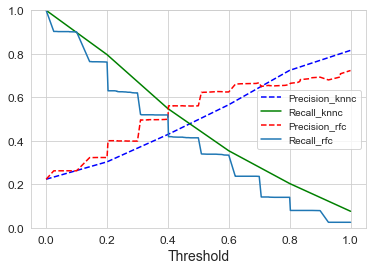

In [171]:
from sklearn.metrics import precision_recall_curve
precisions_knnc, recalls_knnc, thresholds_knnc = precision_recall_curve(np.ravel(y_test), y_scores_knnc[:,1])
precisions_rfc, recalls_rfc, thresholds_rfc= precision_recall_curve(np.ravel(y_test), y_scores_rfc[:,1])

plt.plot(thresholds_knnc, precisions_knnc[:-1],"b--" , label="Precision_knnc")
plt.plot(thresholds_knnc, recalls_knnc[:-1],"g-" , label="Recall_knnc")
plt.plot(thresholds_rfc, precisions_rfc[:-1],"r--" , label="Precision_rfc")
plt.plot(thresholds_rfc, recalls_rfc[:-1],"-" , label="Recall_rfc")
plt.xlabel("Threshold")

plt.legend(loc=0)
plt.ylim([0,1])


From the graph above, it looks like that the threshold about 0.5 gives similar values for precision and recall. We can go with a lower threshold that gives a higher recall value but then the precision will be lower. 

Text(0, 0.5, 'Recall')

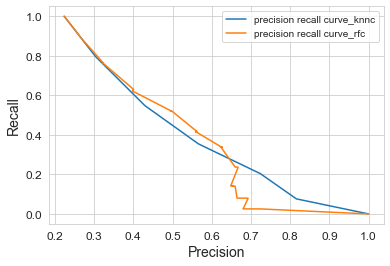

In [173]:
plt.plot(precisions_knnc, recalls_knnc, label="precision recall curve_knnc")
plt.plot(precisions_rfc, recalls_rfc, label="precision recall curve_rfc")
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Recall")

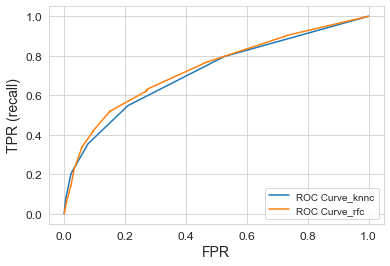

In [174]:
from sklearn.metrics import roc_curve
fpr_knnc, tpr_knnc, thresholds_knnc = roc_curve(np.ravel(y_test), y_scores_knnc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(np.ravel(y_test), y_scores_rfc[:,1])
plt.plot(fpr_knnc, tpr_knnc, label="ROC Curve_knnc")
plt.plot(fpr_rfc, tpr_rfc, label="ROC Curve_rfc")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)


In [172]:
from sklearn.metrics import roc_auc_score

print('Area under curve for knnc: %.3f%%' % (roc_auc_score(np.ravel(y_test),y_scores_knnc[:,1])))
print('Area under curve for rfc: %.3f%%' %(roc_auc_score(np.ravel(y_test),y_scores_rfc[:,1])))

Area under curve for knnc: 0.716%
Area under curve for rfc: 0.733%


#### Grid Search

In [148]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [4,5,10,20,50]}
random_forest = rfc(n_estimators=5)

grid_search = GridSearchCV(estimator=random_forest, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=5, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='war

In [149]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_estimators': 50}

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [150]:
param_grid = {'n_neighbors': [3,5,10,20]}
k_neighbors = knnc(n_neighbors=4)

grid_search = GridSearchCV(estimator=k_neighbors, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

grid_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [151]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


Here I fit the models again with the best paramters and calculate the are under curve again.

In [155]:
final_model_knnc=knnc(n_neighbors=20).fit(X_train, np.ravel(y_train))
final_model_rfc = rfc(n_estimators=50).fit(X_train, np.ravel(y_train))

In [156]:
y_scores_knnc = final_model_knnc.predict_proba(X_test)
y_scores_rfc = final_model_rfc.predict_proba(X_test)

In [167]:
print('Area under curve for knnc: %.3f%%' % (roc_auc_score(np.ravel(y_test),y_scores_knnc[:,1])))
print('Area under curve for rfc: %.3f%%' % (roc_auc_score(np.ravel(y_test),y_scores_rfc[:,1])))

Area under curve for knnc: 0.756%
Area under curve for rfc: 0.757%


As it can be seen the auc increased for both models.

### 4. Conclusions

The dataset did not need much cleaning. Comapring cross validation scores for the two methods (K nearest neighbors and Random Forest classifiers) on training set, Random Forest had a slightly better mean accuracy (80.64% vs. 79.61%). 
The models were fitted and then used for prediction on the test dataset. Comparing the two methods' ROC curves, it was observed that they both had a similar auc with a slightly larger area under curve for  Random Forest (0.733 vs. 0.716).

Then a grid search was performed on n_estimater parameter for Random Forest and n_neighbor paramter for knn and the best values in the list of paramters were 50 for n_estimator and 20 for knn n_neighbor. With these new parameters the auc was calculated for both models again and they both increased (0.757 and 0.756 respectively for Random Forest and knn).